In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Bar Charts

A __bar chart__ depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


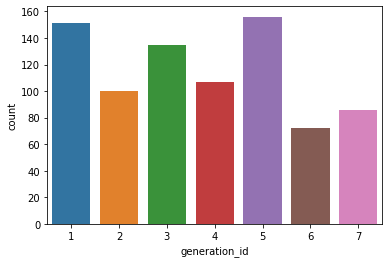

In [3]:
# A semicolon (;) at the end of the statement will supress printing the plotting information
sns.countplot(data=pokemon, x='generation_id');

To make sure that we have a single color in the bars. We can use seaborn's color palette.

`sns.color_palette()` - gives a list of colors which are available. Internally its arranged as a list of tuples we can see that using `sns.color_palette()[0]`. We can store the required/preferred color in the base_color variable. Then in the `sns.countplot()` function we can put the color parameter to base_color.

To make sure that the nominal variables of __generation_id__ are in the descending order in the bar graph we can use `pd.Series.value_counts().index` function and assign it to the `order` parameter.

In [4]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [5]:
base_color = sns.color_palette()[0] 
sns.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [6]:
gen_order = pokemon['generation_id'].value_counts().index

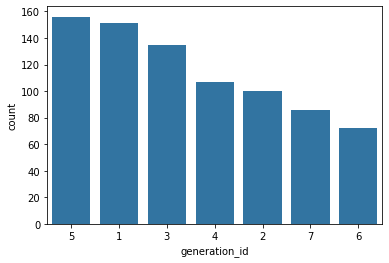

In [7]:
sns.countplot(data=pokemon, x='generation_id', color = base_color, order = gen_order);

#### Rotating the labels in the x-axis: use `plt.xticks(rotation = 90)`

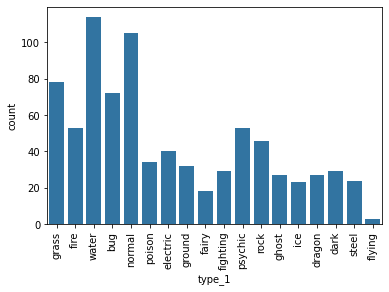

In [8]:
sns.countplot(data = pokemon, x = 'type_1', color=base_color);
plt.xticks(rotation=90);

To create a horizontal barchart replace `x` with `y` in the parameters.

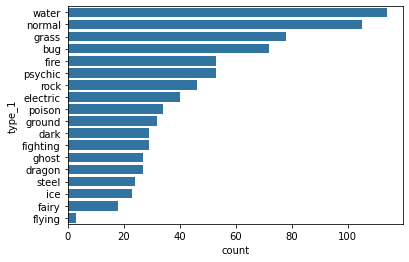

In [9]:
type_order = pokemon['type_1'].value_counts().index
sns.countplot(data = pokemon, y = 'type_1', color=base_color, order = type_order);

- __Absolute frequency__ is the count/frequency of the objects which we plotted in the above graphs.
- __Relative frequecny__ is the proportion of data that falls in each category.

### Plot a bar chart having the proportions, instead of the actual count, on one of the axes.

##### Step 1. Find the maximum proportion of bar

In [10]:
type_counts = pokemon['type_1'].value_counts()
# Returns the sum of all not-null values in `type` column
n_pokemon = pokemon['type_1'].value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1412639405204461


#### Step 2. Create an array of evenly spaced proportioned values

In [11]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14])

We need x-tick labels that must be evenly spaced on the x-axis. For this purpose, we must have a list of labels ready with us, before using it with `plt.xticks()` function.

#### Step 3. Create a list of String values that can be used as tick labels.

In [12]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

The `xticks` and `yticks` functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

I've also added a `ylabel` call to make it clear that we're no longer working with straight counts.

####  Step 4. Plot the bar chart, with new x-tick labels

In [13]:
n_pokemon

807

In [14]:
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14])

In [15]:
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

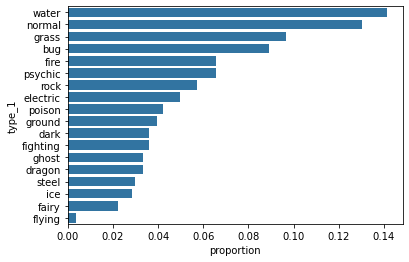

In [16]:
sns.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

#### Print the text (proportion) on the bars of a horizontal plot

  Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)

In [17]:
type_counts

water       114
normal      105
grass        78
bug          72
fire         53
psychic      53
rock         46
electric     40
poison       34
ground       32
dark         29
fighting     29
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type_1, dtype: int64

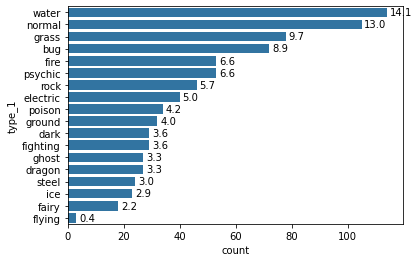

In [18]:
sns.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);
# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')

#### Print the text (proportion) below the bars of a Vertical plot.

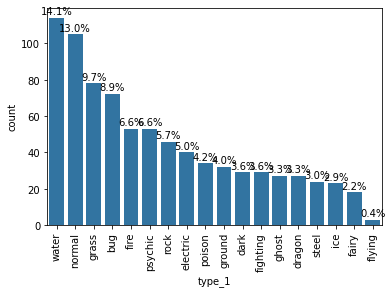

In [19]:
sns.countplot(data=pokemon, x='type_1', color=base_color, order=type_order);

# Recalculating the type_counts just to have clarity.
type_counts = pokemon['type_1'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

I use the `.get_text()` method to obtain the category name, so I can get the count of each category level. At the end, I use the `text` function to print each percentage, with the x-position, y-position, and string as the three main parameters to the function.

> __Tip__ - Is the text on the bars not readable clearly? Consider changing the size of the plot by using the following:

In [20]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

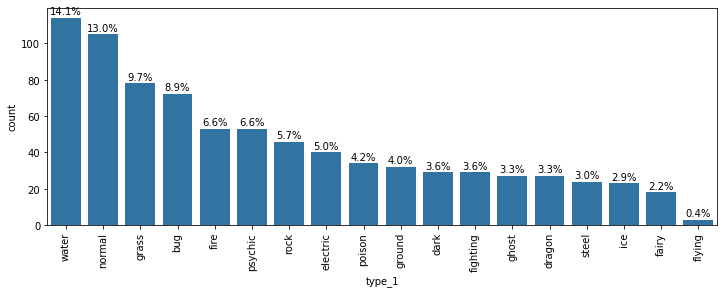

In [21]:
sns.countplot(data=pokemon, x='type_1', color=base_color, order=type_order);

# Recalculating the type_counts just to have clarity.
type_counts = pokemon['type_1'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

## `seaborn.barplot()`

The `seaborn.barplot()` is a useful function to keep in mind if your data is summarized and you still want to build a bar chart. If your data is not yet summarized, however, just use the countplot function so that you don't need to do extra summarization work. In addition, you'll see what barplot's main purpose is in the next lesson when we discuss adaptations of univariate plots for plotting bivariate data.

Seaborn's barplot function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable. 

In [22]:
sales_data = pd.read_csv('sales-data.csv')
sales_data.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [23]:
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

_What if we want to visualize these missing value counts?_  
One interesting way we can apply bar charts is through the visualization of missing data. We could treat the variable names as levels of a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, unsummarized form, we need to make use of a different plotting function.

In [24]:
# Let's drop the column that do not have any NaN/None values
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
print(na_counts)

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


#### Plot the bar chart from the NaN tabular data, and also print values on each bar

C:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


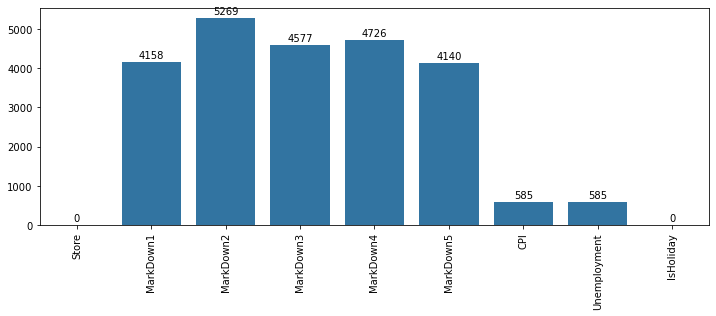

In [25]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(na_counts.index.values, na_counts, color = base_color)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+300, count, ha = 'center', va='top')

#### Plot two histograms side-by-side

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with the identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

`pyplot.subplot()` and `pyplot.figure()`

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The `figure()` function is called with the "`figsize`" parameter so that we can have a larger figure to support having multiple subplots. 

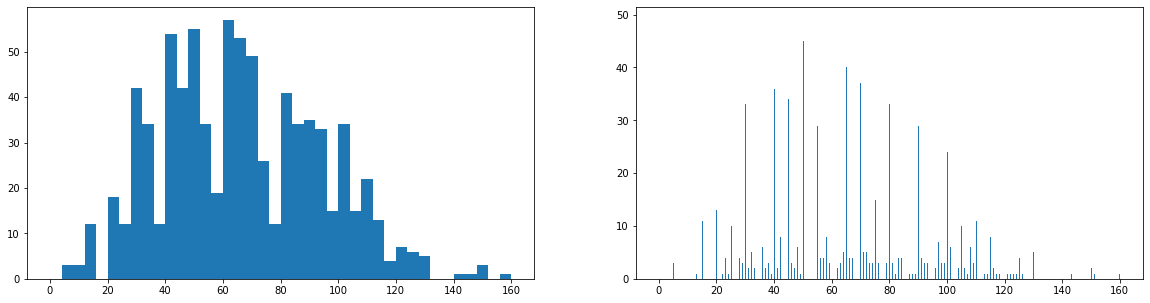

In [26]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

### Figures, Axes, and Subplots

The base of visualization in matplotlib is a [Figure](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html) object. Contained within each Figure will be one or more Axes objects, each [Axes](https://matplotlib.org/api/axes_api.html) object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly. Let's say that the following expression is run inside a Jupyter notebook to create a histogram:

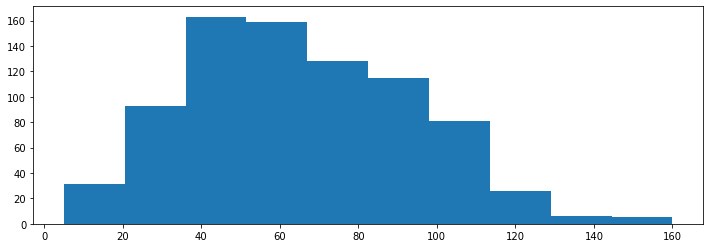

In [27]:
plt.hist(data=pokemon, x='speed');

Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

![](1.PNG)

This hierarchy of objects is useful to know about so that we can take more control over the layout and aesthetics of our plots. One alternative way we could have created the histogram is to explicitly set up the Figure and Axes like this:

#### Demonstrate `figure.add_axes()` and `axes.hist()`

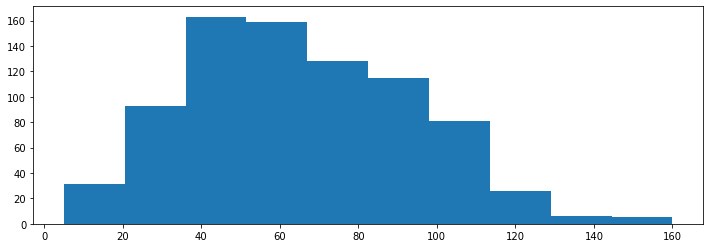

In [28]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

`figure()` creates a new Figure object, a reference to which has been stored in the variable `fig`. One of the Figure methods is `.add_axes()`, which creates a new Axes object in the Figure. The method requires one list as argument specifying the dimensions of the Axes: the first two elements of the list indicate the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) and the last two elements specifying the Axes width and height, respectively. We refer to the Axes in the variable `ax`. Finally, we use the Axes method `.hist()` just like we did before with `plt.hist()`.

#### Use axes with `seaborn.countplot()`

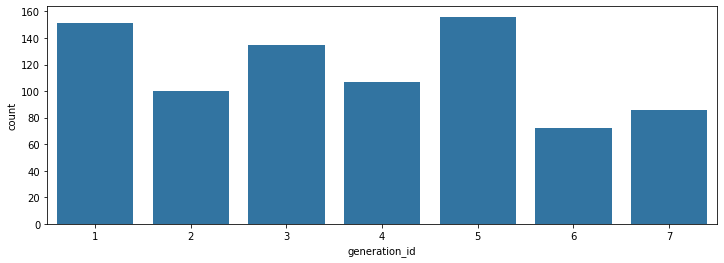

In [29]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sns.color_palette()[0]
sns.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax);

In the above two cases, there was no purpose to explicitly go through the Figure and Axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a Figure or Axes, and they'll automatically target the most recent Figure or Axes worked with. As an example of this, let's review in detail how `subplot()` was used on the Histograms page:

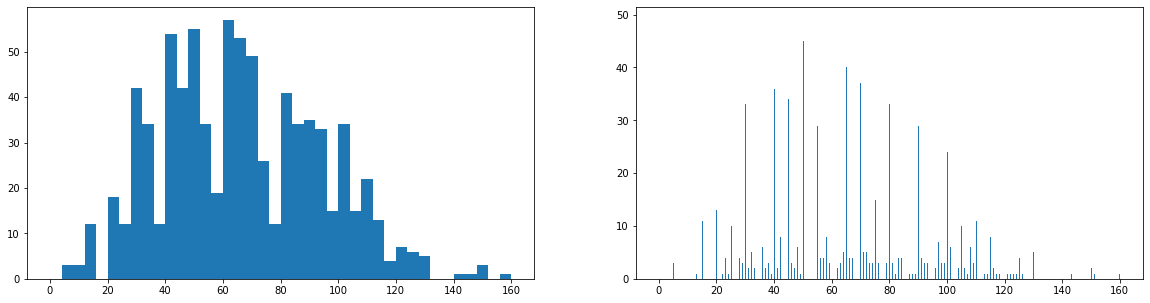

In [30]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

First of all, `plt.figure(figsize = [20, 5])` creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 20 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

Then, `plt.subplot(1, 2, 1)` creates a new Axes in our Figure, its size determined by the `subplot()` function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). (You'll see the indexing a little better in the example at the end of the page.) Again, Python will implicitly set that Axes as the current Axes, so when the `plt.hist()` call comes, the histogram is plotted in the left-side subplot.

Finally, `plt.subplot(1, 2, 2)` creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next `plt.hist()` call comes, the histogram gets drawn in the right-side subplot.

![](2.PNG)

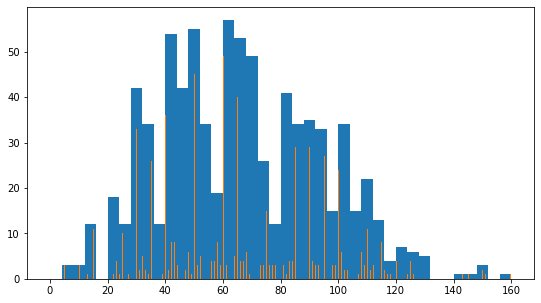

In [31]:
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
# plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

#### Outliers and Axis Limits

##### Plot the histogram from the data having a skewed distribution of values

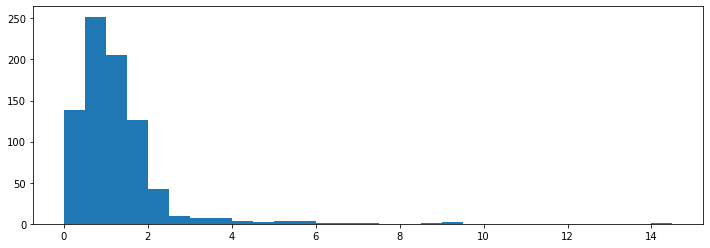

In [32]:
# Load the data, and see the height column
pokemon = pd.read_csv('pokemon.csv')
pokemon.head(10)

# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)

# Plot the histogram for the height column
plt.hist(data=pokemon, x='height', bins=bins);

This page covers the topic of axis limits; and the next topic is scales and transformations. In order to change a histogram's axis limits, you can add a Matplotlib `xlim()` call to your code. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. See the example below.

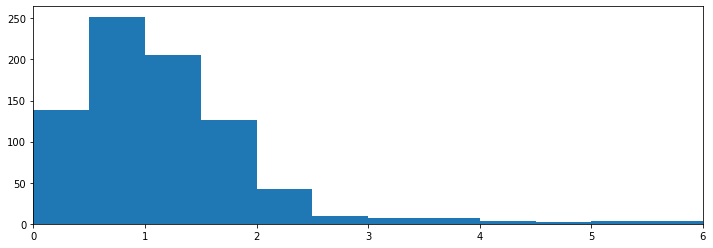

In [33]:
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,6));

#### Scales and Transformations


Classic example of data dealing with different scale is data dealing with finance.

The plot below shows the vehicle prices - LHS and RHS has log-transformed data.  
![](3.PNG)

Variables such as these tend to have a range that croses many orders of magnitudes and are usually skewed to the right. With bins of sizes of 10k we end up with an unevenly balanced plot with a lot of gaps to capture the highest value points.

If we have a linear model in mind it will be very difficult for a predictive variable to capture small differences at low end of the scale, at the same time large distances on the high end.

The transformation that we apply on this case is logarithmic scaling. So differences on the scaled axis represents multiplicatove differences rather than arithmatic differences.

![](4.PNG)

In this plot the values in each bar are about 25% larger than the values in the previous bar.

Instead of tick mark increasing by adding 40k to the previous each tick mark is twice the value of the previous. One common distribution that results from this is the log-normal distribution. The data looks approximately normal after log transform. The 2nd plot suggests that creating a model of logarithmic transform might work better. Under this transformation, linear changes in predictor features will result in multiplicative effects in the price. 

Note that all values in the variable must be positive to take log transform. If we continue to the left in the log distribution our values will continue to be divided by two but no matter how far we go we will never reach zero or any negative number.

Axes transformations are useful as they allow to interpret your data with naturally recored units. For example an alternative approach we could have taken was to apply the transformation directly to the data.

![](5.PNG)

When we plot the transformed data on a linear scale we get the same picture as the original data plotted on a log scale. However to interpret the values we need to mentally apply the inverse transformation. As most people wont understand that $10^{4.6}$ is same as 40k.

![](6.PNG)

We can transform the data as well as transform the axes being considered.

- For data analysis step we will need to transform the data.
- But for data visualization its best to stick with axes transformation.

#### Scale the x-axis to log-type

`pokemon['weight']` units for this variable are in kgs.  Histogram for this varaiable are highly skewed. 

Text(0.5, 0, 'The x-axis limits are NOT changed. They are only scaled to log-type')

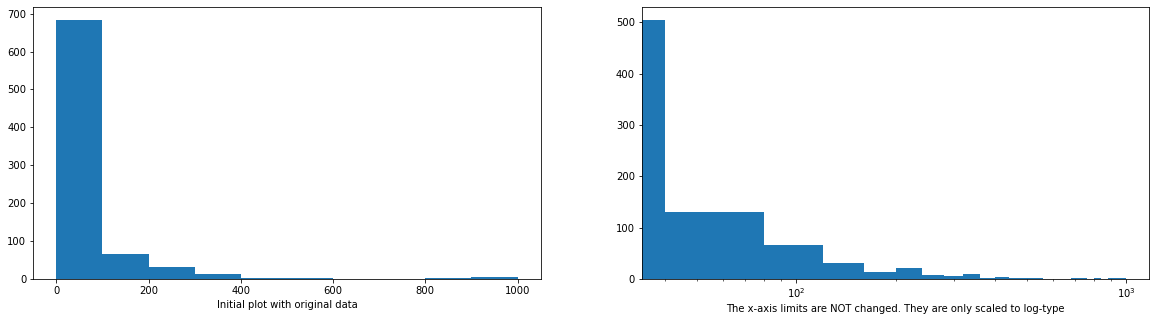

In [34]:
plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)

# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
plt.xlabel('The x-axis limits are NOT changed. They are only scaled to log-type')

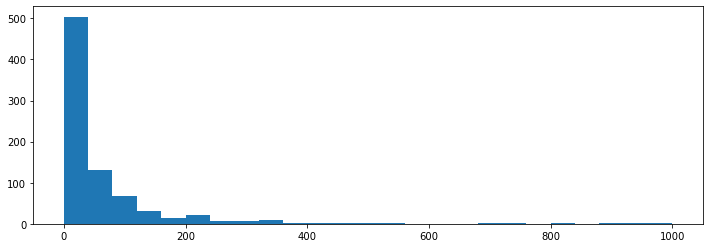

In [35]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);

Rather than trimming the axis limits like before , we will be using the axes transform instead here we will be suing matplotlibs `plt.xscale()`. The argument in the xscale() represents the axis scale type to apply. The possible values are: `{"linear", "log", "symlog", "logit", ...}`.

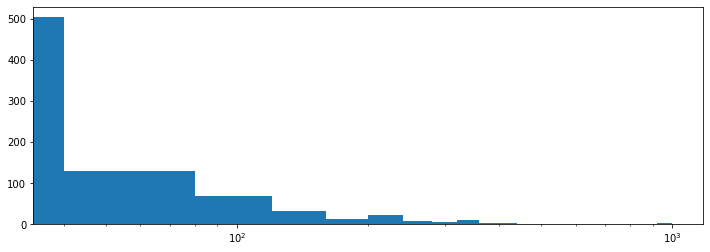

In [36]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');

In order to make the plots interpretable we need to modify the bin boundaries and generate more informative axis ticks. 

First look at the bins, for that we need to use the `pd.Series.describe()` to understand the min-max details. 

In [37]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [38]:
np.log10(pokemon['weight']).describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

> Remember we are not transforming the data we are transforming the axes such that the scaled-axes values can be mapped to the original data.

Log10 of these values are between [-1, 3). These gives us the limits for our bins. The bin edges will be $10^{[-1,3)]}$ so that they are evenly spaced after taking the logarithm. 

In [39]:
bins = 10**np.arange(-1, 3 + 0.1, 0.1)
bins

array([1.00000000e-01, 1.25892541e-01, 1.58489319e-01, 1.99526231e-01,
       2.51188643e-01, 3.16227766e-01, 3.98107171e-01, 5.01187234e-01,
       6.30957344e-01, 7.94328235e-01, 1.00000000e+00, 1.25892541e+00,
       1.58489319e+00, 1.99526231e+00, 2.51188643e+00, 3.16227766e+00,
       3.98107171e+00, 5.01187234e+00, 6.30957344e+00, 7.94328235e+00,
       1.00000000e+01, 1.25892541e+01, 1.58489319e+01, 1.99526231e+01,
       2.51188643e+01, 3.16227766e+01, 3.98107171e+01, 5.01187234e+01,
       6.30957344e+01, 7.94328235e+01, 1.00000000e+02, 1.25892541e+02,
       1.58489319e+02, 1.99526231e+02, 2.51188643e+02, 3.16227766e+02,
       3.98107171e+02, 5.01187234e+02, 6.30957344e+02, 7.94328235e+02,
       1.00000000e+03])

In [40]:
bins[0]

0.1

In [41]:
bins[-1]

999.999999999998

Plot with modified bin boundaries.

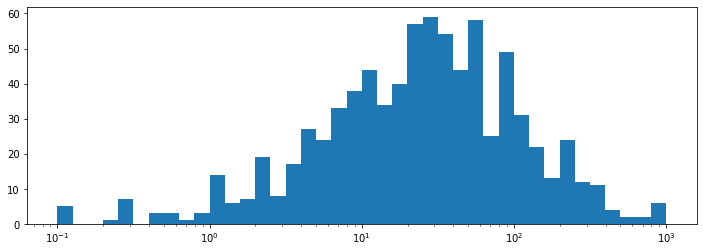

In [42]:
bins = 10**np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');

The plot looks better now showing a unimodal distibution but the tick marks could be made more interpretable.
We can start with writng out the given ticks: `ticks = [0.1, 1 10, 100, 1000]`

But we might want to add more. Here we can do some hard-coding as outside of the given values of 10 there aren't nice evenly spaced intermediate values. We can still get close however. A 3 is about halfway between consecutive powers of 10 on a log scale. Adding these values to our ticks list complete our exploratory plot. Its much easier to read now with most common weights between 10 and 100 and peak around 30.

`ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]`

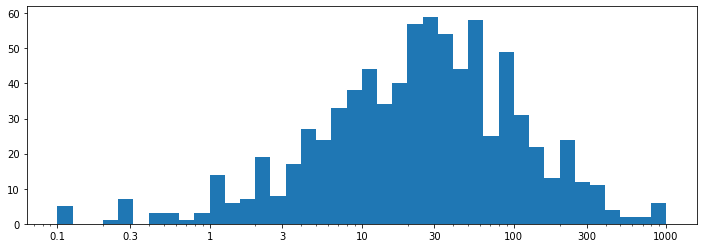

In [43]:
bins = 10**np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);

> It is important that the `xticks` are specified after `xscale` since that function has its own built-in tick settings.


#### Custom scaling the given data Series, instead of using the built-in log scale

If you want to use a different transformation that's not available in `xscale`, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

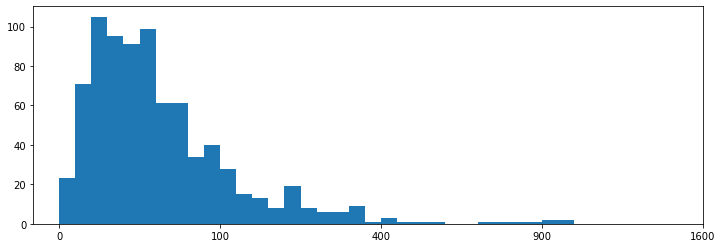

In [44]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));